Text(0, 0.5, 'Y-axis')

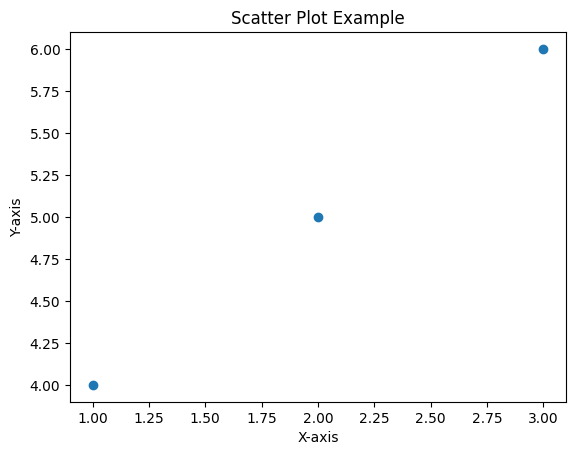

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(np.array([1, 2, 3]), np.array([4, 5, 6]))

ax.set_title('Scatter Plot Example')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

In [2]:
ax.__dict__

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <Axes: title={'center': 'Scatter Plot Example'}, xlabel='X-axis', ylabel='Y-axis'>,
 'figure': <Figure size 640x480 with 1 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7ff790a3b100>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 640x480 with 1 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]]),
 '_originalPosition': Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]]),
 '_aspect': 'auto',
 '_adjustable': 'box',
 '_anchor': '

In [ ]:
# retrieve the "ax.scatter" part from the __dict__ to get the function called and inherently the plot type
# Inspect the type of the first element in _children collection to determine plot type

# Method 1: Check the class type of the collections
if hasattr(ax, '_children') and ax._children:
    collection_type = type(ax._children[0]).__name__
    print(f"Collection type: {collection_type}")
    
    # PathCollection typically means a scatter plot
    if collection_type == 'PathCollection':
        plot_type = 'scatter'
    # Add more mappings as needed
    else:
        plot_type = 'unknown'
    
# Method 2: Check collections directly
elif hasattr(ax, 'collections') and ax.collections:
    collection_type = type(ax.collections[0]).__name__
    print(f"Collection type: {collection_type}")
    
    if collection_type == 'PathCollection':
        plot_type = 'scatter'
    else:
        plot_type = 'unknown'
else:
    plot_type = 'unknown'

print(f"Detected plot type: {plot_type}")

IndexError: list index out of range

In [3]:
ax.xaxis.__dict__

{'_stale': False,
 'stale_callback': <function matplotlib.artist._stale_axes_callback(self, val)>,
 '_axes': <Axes: title={'center': 'Scatter Plot Example'}, xlabel='X-axis', ylabel='Y-axis'>,
 'figure': <Figure size 640x480 with 1 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': <matplotlib.transforms.TransformedBbox at 0x7ff790a7a0d0>,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7ff790a3b850>,
 '_remove_method': None,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_remove_overlapping_locs': True,
 'isDefault_label': False,
 'major': <matplotlib.axis.Ticker at 0x7ff790a3b880>,
 'minor': <matplotlib.axis.Ticker at 0x7ff790a3b8e0>,
 'callbacks': <matplotlib.cbook.Callba

In [4]:
import pandas as pd

In [ ]:
# Retrieve all nescessary data from the Axes object
# Create Vega Lite spec from the data, plot type and other properties using Altair

# !pip install altair
import altair as alt

def create_vega_lite_spec(fig, ax, plot_type=None):
    # Auto-detect plot type if not provided
    if plot_type is None:
        if hasattr(ax, 'collections') and ax.collections:
            collection_type = type(ax.collections[0]).__name__
            if collection_type == 'PathCollection':
                plot_type = 'scatter'
            # Add more mappings for other plot types as needed
            else:
                plot_type = 'unknown'
        else:
            plot_type = 'unknown'
        
        print(f"Auto-detected plot type: {plot_type}")
    
    # Extract data from the Axes object
    if plot_type == 'scatter' and hasattr(ax, 'collections') and ax.collections:
        x_data = ax.collections[0].get_offsets()[:, 0]
        y_data = ax.collections[0].get_offsets()[:, 1]
        
        # Ensure we have the same number of labels as data points
        label_value = ax.collections[0].get_label()
        labels = [label_value] * len(x_data)  # Repeat the label for each data point
        
        data = {
            'x': x_data,
            'y': y_data,
            'label': labels
        }
    else:
        raise ValueError(f"Unsupported plot type: {plot_type}")

    # Create a Vega-Lite spec based on the extracted data
    if plot_type == 'scatter':
        chart = alt.Chart(pd.DataFrame(data)).mark_circle().encode(
            x='x',
            y='y',
            color='label'
        )
    else:
        raise ValueError(f"Unsupported plot type: {plot_type}")
    
    return chart

# Create Vega-Lite spec using auto-detection of plot type
vega_lite_spec = create_vega_lite_spec(fig, ax)

# Save the Vega-Lite spec to a file
vega_lite_spec.save('scatter_plot.json')

In [8]:
# read 'scatter_plot.json'
import json
from pprint import pprint
with open('scatter_plot.json', 'r') as f:
    vega_lite_spec = json.load(f)
    pprint(vega_lite_spec)

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.17.0.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
 'data': {'name': 'data-c56e40edbe2f8d02a0480e2c1aacf9ab'},
 'datasets': {'data-c56e40edbe2f8d02a0480e2c1aacf9ab': [{'label': '_child0',
                                                         'x': 1.0,
                                                         'y': 4.0},
                                                        {'label': '_child0',
                                                         'x': 2.0,
                                                         'y': 5.0},
                                                        {'label': '_child0',
                                                         'x': 3.0,
                                                         'y': 6.0}]},
 'encoding': {'color': {'field': 'label', 'type': 'nominal'},
              'x': {'field': 'x', 'type': 'quantitative'},
              'y': {'field': 'y', 'type':

In [ ]:
# Experiment with different Matplotlib plot types

# Create a new figure with multiple plot types
fig2, axs = plt.subplots(2, 2, figsize=(10, 8))

# 1. Simple Line Plot
axs[0, 0].plot(np.array([1, 2, 3, 4]), np.array([2, 3, 5, 7]))
axs[0, 0].set_title('Line Plot')

# 2. Bar Chart
axs[0, 1].bar(np.array([1, 2, 3, 4]), np.array([7, 3, 5, 2]))
axs[0, 1].set_title('Bar Chart')

# 3. Scatter with different sizes
axs[1, 0].scatter(np.array([1, 2, 3, 4]), np.array([2, 3, 5, 7]), s=np.array([20, 60, 120, 200]))
axs[1, 0].set_title('Scatter with Sizes')

# 4. Histogram
axs[1, 1].hist(np.random.normal(0, 1, 100), bins=20)
axs[1, 1].set_title('Histogram')

plt.tight_layout()
plt.show()

# For future extension: print the type of each collection
for i in range(2):
    for j in range(2):
        if hasattr(axs[i, j], 'collections') and axs[i, j].collections:
            print(f"Plot [{i}, {j}]: {type(axs[i, j].collections[0]).__name__}")
        elif hasattr(axs[i, j], 'patches') and axs[i, j].patches:
            print(f"Plot [{i}, {j}]: {type(axs[i, j].patches[0]).__name__}")
        elif hasattr(axs[i, j], 'lines') and axs[i, j].lines:
            print(f"Plot [{i}, {j}]: {type(axs[i, j].lines[0]).__name__}")
        else:
            print(f"Plot [{i}, {j}]: Unknown type")

In [ ]:
# Improvements for a more comprehensive plot type detector

def detect_plot_type(ax):
    """
    Detect the type of plot in a Matplotlib Axes object
    """
    # Check for scatter plots (PathCollection)
    if hasattr(ax, 'collections') and ax.collections:
        for collection in ax.collections:
            if type(collection).__name__ == 'PathCollection':
                return 'scatter'
    
    # Check for line plots (Line2D)
    if hasattr(ax, 'lines') and ax.lines:
        return 'line'
    
    # Check for bar charts (Rectangle patches)
    if hasattr(ax, 'patches') and ax.patches:
        if all(type(patch).__name__ == 'Rectangle' for patch in ax.patches):
            return 'bar'
    
    # Check for histograms (similar to bar charts but with specific layout)
    if hasattr(ax, 'patches') and ax.patches:
        if all(type(patch).__name__ == 'Rectangle' for patch in ax.patches):
            # This is a simplistic check - histograms typically have equally spaced bars
            # A more robust check would analyze the distribution of the bars
            patch_widths = [patch.get_width() for patch in ax.patches]
            if len(patch_widths) > 5 and len(set(round(w, 5) for w in patch_widths)) <= 3:
                return 'histogram'
    
    # Add more type checks as needed
    
    return 'unknown'

# Test the detector on the first plot we created
print(f"Detected type for original plot: {detect_plot_type(ax)}")

# (You could also test it on each subplot from the previous cell)